In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('nifty.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),bollinger,upper,lower
0,0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,NaN,NaN,NaN
1,1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,NaN,NaN,NaN
2,2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,NaN,NaN,NaN
3,3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,NaN,NaN,NaN
4,4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,NaN,NaN,NaN


In [3]:
df.shape

(494, 11)

In [4]:
df['Call']=np.zeros(shape=(494))
df=df.dropna(axis=0)

In [5]:
for i in range(13,494):
    if(df['Close'][i] < df['lower'][i]):
        df['Call'][i]='Buy'
    elif(df['lower'][i]<df['Close'][i] and df['Close'][i]<df['bollinger'][i]):
        df['Call'][i]='Hold Buy/Liquidate Short'
    elif(df['Close'][i]> df['bollinger'][i] and df['Close'][i]<df['upper'][i]):
        df['Call'][i]='Hold Short/Liquidate Buy'
    elif(df['Close'][i]> df['upper'][i]):
        df['Call'][i]='Short'

C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """

In [6]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),bollinger,upper,lower,Call
13,13,01-Jun-2017,9603.55,9634.65,9589.90,9616.10,181533283,9482.61,9506.953571,9693.707883,9320.199260,Hold Short/Liquidate Buy
14,14,02-Jun-2017,9657.15,9673.50,9637.45,9653.50,167195027,8564.30,9521.817857,9720.230456,9323.405258,Hold Short/Liquidate Buy
15,15,05-Jun-2017,9656.30,9687.20,9640.70,9675.10,131685021,7192.24,9533.450000,9747.893211,9319.006789,Hold Short/Liquidate Buy
16,16,06-Jun-2017,9704.25,9709.30,9630.20,9637.15,150379695,8416.55,9541.407143,9762.775002,9320.039284,Hold Short/Liquidate Buy
17,17,07-Jun-2017,9663.95,9678.55,9630.55,9663.90,165669924,8989.36,9558.153571,9778.507146,9337.799997,Hold Short/Liquidate Buy


In [7]:
from sklearn.model_selection import train_test_split

X=df[['lower','bollinger','upper']]
y=df['Call']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [8]:
#____KNN Model____
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

print('KNN\'s Score:' ,knn.score(X_test,y_test))

[[ 0  3  2  0]
 [ 1 28 13  0]
 [ 1 33 58  1]
 [ 0  0  5  0]]
                          precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00         5
Hold Buy/Liquidate Short       0.44      0.67      0.53        42
Hold Short/Liquidate Buy       0.74      0.62      0.68        93
                   Short       0.00      0.00      0.00         5

                accuracy                           0.59       145
               macro avg       0.30      0.32      0.30       145
            weighted avg       0.60      0.59      0.59       145

KNN's Score: 0.593103448275862


In [9]:
#___Decision Tree___
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree\'s Score:', dtree.score(X_test,y_test))

Decision Tree's Score: 0.5655172413793104


In [10]:
#__SVM___
from sklearn.svm import SVC
model=SVC(gamma='auto',decision_function_shape='ovo',)
model.fit(X_train,y_train)

print('SVm\'s Model;',model.score(X_test,y_test))

SVm's Model; 0.6413793103448275


In [11]:
tcs=pd.read_csv('Large_Cap/TCS.csv')
tcs=tcs[tcs['Series']=='EQ']
tcs.Date=pd.to_datetime(tcs['Date'])

In [12]:
tcs['bollinger']=tcs['Close Price'].rolling(14).mean()
std=tcs['Close Price'].rolling(14).std()
tcs['upper']=tcs['bollinger']+2*std
tcs['lower']=tcs['bollinger']-2*std
tcs=tcs.dropna(axis=0)

In [13]:
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,bollinger,upper,lower
13,TCS,EQ,2017-06-01,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,2657.609185,2389.840815
14,TCS,EQ,2017-06-02,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,2637.128396,2438.864462
15,TCS,EQ,2017-06-05,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,2633.238603,2467.725683
16,TCS,EQ,2017-06-06,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,2664.142666,2471.200192
17,TCS,EQ,2017-06-07,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,2671.098920,2475.536794


In [14]:
X=tcs[['lower','bollinger','upper']]
tcs['Call']=model.predict(X)
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,bollinger,upper,lower,Call
13,TCS,EQ,2017-06-01,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,2657.609185,2389.840815,Hold Short/Liquidate Buy
14,TCS,EQ,2017-06-02,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,2637.128396,2438.864462,Hold Short/Liquidate Buy
15,TCS,EQ,2017-06-05,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,2633.238603,2467.725683,Hold Short/Liquidate Buy
16,TCS,EQ,2017-06-06,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,2664.142666,2471.200192,Hold Short/Liquidate Buy
17,TCS,EQ,2017-06-07,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,2671.098920,2475.536794,Hold Short/Liquidate Buy


In [15]:
#___4.2____
nifty = pd.read_csv('nifty.csv')

nifty['pct_open_close'] = (nifty.Close - nifty.Open)/nifty.Open *100
nifty['pct_low_high'] = (nifty.High - nifty.Low)/nifty.Low *100
nifty['roll5'] = nifty['Close'].rolling(5).mean()
nifty["std5"] = nifty['Close'].rolling(5).std()

nifty.head()



,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),bollinger,upper,lower,pct_open_close,pct_low_high,roll5,std5
0,0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,NaN,NaN,NaN,0.125615,0.277510,NaN,NaN
1,1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,NaN,NaN,NaN,0.541697,0.643483,NaN,NaN
2,2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,NaN,NaN,NaN,0.085631,0.490191,NaN,NaN
3,3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,NaN,NaN,NaN,-0.251238,0.753868,NaN,NaN
4,4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,NaN,NaN,NaN,-0.443510,1.224609,9468.15,47.164301


In [16]:
nifty.shape

(494, 15)

In [17]:
nifty['Action']=np.nan
for i in range(len(nifty)-1):
    if nifty['Close'][i+1]>= nifty['Close'][i]:
        nifty['Action'][i]=1
    elif nifty['Close'][i+1]< nifty['Close'][i]:
        nifty['Action'][i]= -1
nifty=nifty.dropna()
df.head()

C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\admin\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),bollinger,upper,lower,Call
13,13,01-Jun-2017,9603.55,9634.65,9589.90,9616.10,181533283,9482.61,9506.953571,9693.707883,9320.199260,Hold Short/Liquidate Buy
14,14,02-Jun-2017,9657.15,9673.50,9637.45,9653.50,167195027,8564.30,9521.817857,9720.230456,9323.405258,Hold Short/Liquidate Buy
15,15,05-Jun-2017,9656.30,9687.20,9640.70,9675.10,131685021,7192.24,9533.450000,9747.893211,9319.006789,Hold Short/Liquidate Buy
16,16,06-Jun-2017,9704.25,9709.30,9630.20,9637.15,150379695,8416.55,9541.407143,9762.775002,9320.039284,Hold Short/Liquidate Buy
17,17,07-Jun-2017,9663.95,9678.55,9630.55,9663.90,165669924,8989.36,9558.153571,9778.507146,9337.799997,Hold Short/Liquidate Buy


In [19]:
from sklearn.model_selection import train_test_split

X=nifty[['pct_open_close','pct_low_high','roll5','std5']].values
y=nifty['Action'].values

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [20]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

random_forest = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.5138888888888888


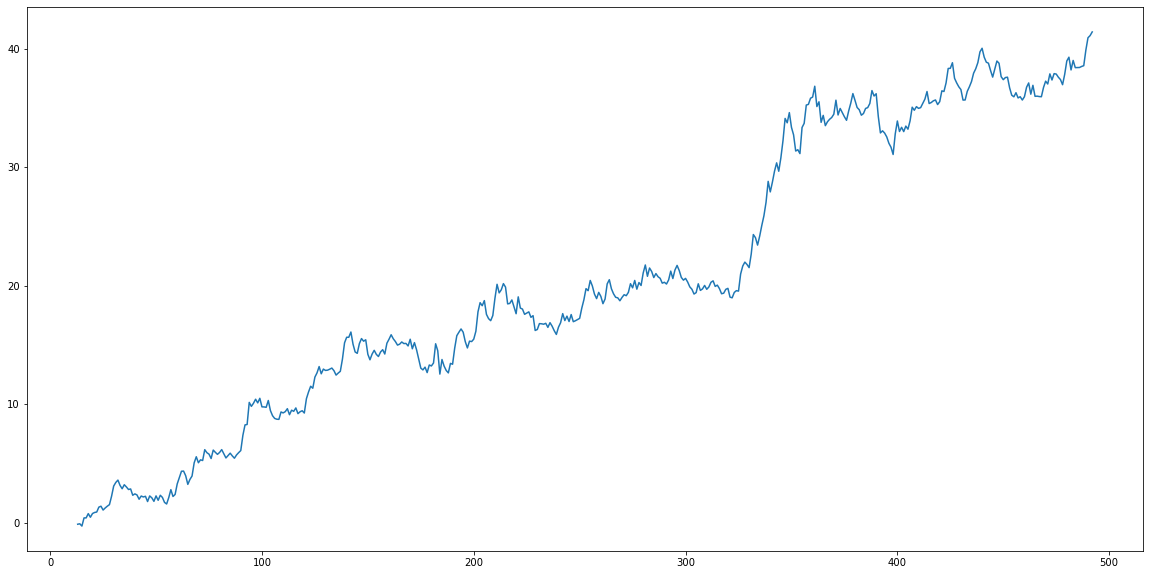

In [21]:
import matplotlib.pyplot as plt

nifty['Net Cummulative Returns'] = (((nifty['Open'] - nifty['Close'])/(nifty['Open']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(nifty['Net Cummulative Returns'])

